In [126]:
import numpy as np
import pandas as pd

In [127]:
wx_study = pd.read_csv('study_wx_data.csv')

In [128]:
wx_membership = pd.read_csv('wx_membership_data.csv')

In [129]:
wx_study.head()

,user_id,Total_cash,Total_minute,Total_no,auth_year,follow_year,create_year,f_watch
0,67,1854.00,108.00,3,2014.0,2023,2018.0,3
1,83,1181.90,8498.00,7,2014.0,2021,2017.0,7
2,112,1252.01,5083.54,22,2017.0,2022,2018.0,22
3,119,109869.02,28377.70,65,2017.0,2021,2019.0,65
4,123,1620.81,875.00,25,2015.0,2020,2018.0,25


In [130]:
wx_study.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23870 entries, 0 to 23869
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   user_id       23870 non-null  int64  
 1   Total_cash    23870 non-null  float64
 2   Total_minute  23870 non-null  float64
 3   Total_no      23870 non-null  int64  
 4   auth_year     23853 non-null  float64
 5   follow_year   23870 non-null  int64  
 6   create_year   23870 non-null  float64
 7   f_watch       23870 non-null  int64  
dtypes: float64(4), int64(4)
memory usage: 1.5 MB


In [131]:
wx_membership.head()

,Unnamed: 0,user_id,paid_cash,auth_year,follow_year,create_year,Recency,Frequency,Monetary,F_Quartile
0,0,6,1118.01,2014.0,2021,2023.0,5,4,597.00,3.0
1,1,7,601.00,2014.0,2022,2018.0,53,1,300.00,NaN
2,2,11,7225.36,2014.0,2022,2018.0,24,4,1251.36,3.0
3,3,13,2421.00,2014.0,2022,2016.0,7,7,1899.00,6.0
4,4,15,2316.51,2017.0,2020,2018.0,11,7,1677.50,6.0


In [132]:
wx_membership.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51197 entries, 0 to 51196
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   51197 non-null  int64  
 1   user_id      51197 non-null  int64  
 2   paid_cash    51197 non-null  float64
 3   auth_year    51186 non-null  float64
 4   follow_year  51197 non-null  int64  
 5   create_year  51197 non-null  float64
 6   Recency      51197 non-null  int64  
 7   Frequency    51197 non-null  int64  
 8   Monetary     51197 non-null  float64
 9   F_Quartile   32422 non-null  float64
dtypes: float64(5), int64(5)
memory usage: 3.9 MB


In [133]:
df_merged = pd.merge(wx_study, wx_membership, on='user_id', how='inner')

In [134]:
df_merged.head()

,user_id,Total_cash,Total_minute,Total_no,auth_year_x,follow_year_x,create_year_x,f_watch,Unnamed: 0,paid_cash,auth_year_y,follow_year_y,create_year_y,Recency,Frequency,Monetary,F_Quartile
0,67,1854.00,108.00,3,2014.0,2023,2018.0,3,16,1854.00,2014.0,2023,2018.0,58,1,300.0,NaN
1,83,1181.90,8498.00,7,2014.0,2021,2017.0,7,22,1181.90,2014.0,2021,2017.0,6,2,600.0,1.0
2,112,1252.01,5083.54,22,2017.0,2022,2018.0,22,30,1252.01,2017.0,2022,2018.0,7,4,999.0,3.0
3,119,109869.02,28377.70,65,2017.0,2021,2019.0,65,33,109869.02,2017.0,2021,2019.0,10,3,679.0,2.0
4,123,1620.81,875.00,25,2015.0,2020,2018.0,25,34,1620.81,2015.0,2020,2018.0,5,5,1088.7,4.0


In [135]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17213 entries, 0 to 17212
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        17213 non-null  int64  
 1   Total_cash     17213 non-null  float64
 2   Total_minute   17213 non-null  float64
 3   Total_no       17213 non-null  int64  
 4   auth_year_x    17211 non-null  float64
 5   follow_year_x  17213 non-null  int64  
 6   create_year_x  17213 non-null  float64
 7   f_watch        17213 non-null  int64  
 8   Unnamed: 0     17213 non-null  int64  
 9   paid_cash      17213 non-null  float64
 10  auth_year_y    17211 non-null  float64
 11  follow_year_y  17213 non-null  int64  
 12  create_year_y  17213 non-null  float64
 13  Recency        17213 non-null  int64  
 14  Frequency      17213 non-null  int64  
 15  Monetary       17213 non-null  float64
 16  F_Quartile     10952 non-null  float64
dtypes: float64(9), int64(8)
memory usage: 2.4 MB


In [136]:
# 删除 不相关的列
colums_to_drop = ['Total_no', 'Unnamed: 0', 'F_Quartile', 'Monetary', 'Recency', 'follow_year_x', 'create_year_x', 'follow_year_y', 'auth_year_y', 'create_year_y']
df_merged = df_merged.drop(columns=colums_to_drop)
df_merged.head()

,user_id,Total_cash,Total_minute,auth_year_x,f_watch,paid_cash,Frequency
0,67,1854.00,108.00,2014.0,3,1854.00,1
1,83,1181.90,8498.00,2014.0,7,1181.90,2
2,112,1252.01,5083.54,2017.0,22,1252.01,4
3,119,109869.02,28377.70,2017.0,65,109869.02,3
4,123,1620.81,875.00,2015.0,25,1620.81,5


In [53]:
# 定义一个函数来计算符合条件的用户数
def calculate_users(year, freq):
    mask = (df_merged['auth_year_x'] == year) & (df_merged['Frequency'] >= freq)
    return df_merged[mask]['Total_cash'].sum()

# 创建一个空的透视表架构
auth_years_bins = [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]
frequency_bins = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15]

pivot_table = pd.DataFrame(index=auth_years_bins, columns=frequency_bins)

# 使用 calculate_users 函数填充透视表
for year in auth_years_bins:
    for freq in frequency_bins:
        pivot_table.at[year, freq] = calculate_users(year, freq)

# 将结果转换为整数类型并填充缺失值
pivot_table = pivot_table.astype(int).fillna(0)

# 查看结果
print(pivot_table)

            1         2         3         4         5        6        7   \
2014   3016123   2754584   2677060   2350783   1753370   854657   404645   
2015  17449915  16409155  15071520  12424826   9048401  5769006  2479675   
2016  24035172  22003536  18410594  15136830  10449858  6224883  2927467   
2017  35269096  30523202  24026825  17536502  10564026  5228363  1663863   
2018  41628196  31798404  18726679   9307203   3351034  1135545   465795   
2019  61368832  38936686  17788711   6822382   1839261   538053   194668   
2020  43156649  27159059  12744555   2463831    900884   328983   149021   
2021  22483660  10169927   3179967   1206170    546776    29323    29323   
2022   3552167   1393859    495777    235784     96556    58598        0   
2023    804824    276741    118401     68908         0        0        0   

           8       9      10  15  
2014    50971       0      0   0  
2015   833307  317641  69316   0  
2016  1180172  414918  83715   0  
2017   411253  125516  

In [54]:
pivot_table.to_csv('f_watch-f_huiyuan-M.csv')

In [151]:
#筛选
df_fil = df_merged[df_merged['paid_cash'] < 3000]
# 定义一个函数来计算符合条件的用户数
def calculate_users(f, freq):
    mask = (df_fil['f_watch'] >= f) & (df_fil['Frequency'] >= freq)
    return df_fil[mask]['user_id'].nunique()

# 创建一个空的透视表架构
f_bins = [1, 2, 3, 5, 10, 15, 20, 25, 30, 35, 40]
frequency_bins = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15]

pivot_table = pd.DataFrame(index=f_bins, columns=frequency_bins)

# 使用 calculate_users 函数填充透视表
for f in f_bins:
    for freq in frequency_bins:
        pivot_table.at[f, freq] = calculate_users(f, freq)

# 将结果转换为整数类型并填充缺失值
pivot_table = pivot_table.astype(int).fillna(0)

# 查看结果
print(pivot_table)

      1     2     3     4    5    6    7   8   9   10  15
1   9301  5466  2892  1505  825  413  165  24   1   0   0
2   8508  5462  2892  1505  825  413  165  24   1   0   0
3   7476  5113  2888  1505  825  413  165  24   1   0   0
5   5635  4203  2633  1473  824  413  165  24   1   0   0
10  2925  2403  1740  1151  723  382  157  24   1   0   0
15  1593  1375  1080   791  537  310  135  23   1   0   0
20   912   800   650   510  372  227  101  17   1   0   0
25   526   468   396   324  253  149   71  13   1   0   0
30   280   255   209   177  136   82   44   8   1   0   0
35   156   143   122   103   77   43   22   2   0   0   0
40   105    97    83    68   50   26   13   1   0   0   0


In [152]:
pivot_table.to_csv('merged-30-f-f-m-3000.csv')

In [61]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import hdbscan
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors as mcolors


In [144]:
# 使用hdbscan进行聚类
df_fil = df_merged[(df_merged['paid_cash'] <= 80000) & (df_merged['Frequency'] <= 10)].copy()
# 数据预处理
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(df_fil[['f_watch', 'Frequency', 'paid_cash']])

# 使用优化的参数进行聚类
clusterer = hdbscan.HDBSCAN(
    min_cluster_size=800,
    min_samples=8, 
    metric='euclidean', 
    cluster_selection_epsilon=0.07, 
    alpha=3.5, 
    cluster_selection_method='eom', 
    algorithm='best')
clusterer.fit(rfm_scaled)
df_fil['Cluster'] = pd.Series(clusterer.labels_, index=df_fil.index)

# 查看结果
print(df_fil['Cluster'].value_counts())

 1    6203
 2    4693
 4    2581
 3    1494
-1    1222
 0     902
Name: Cluster, dtype: int64


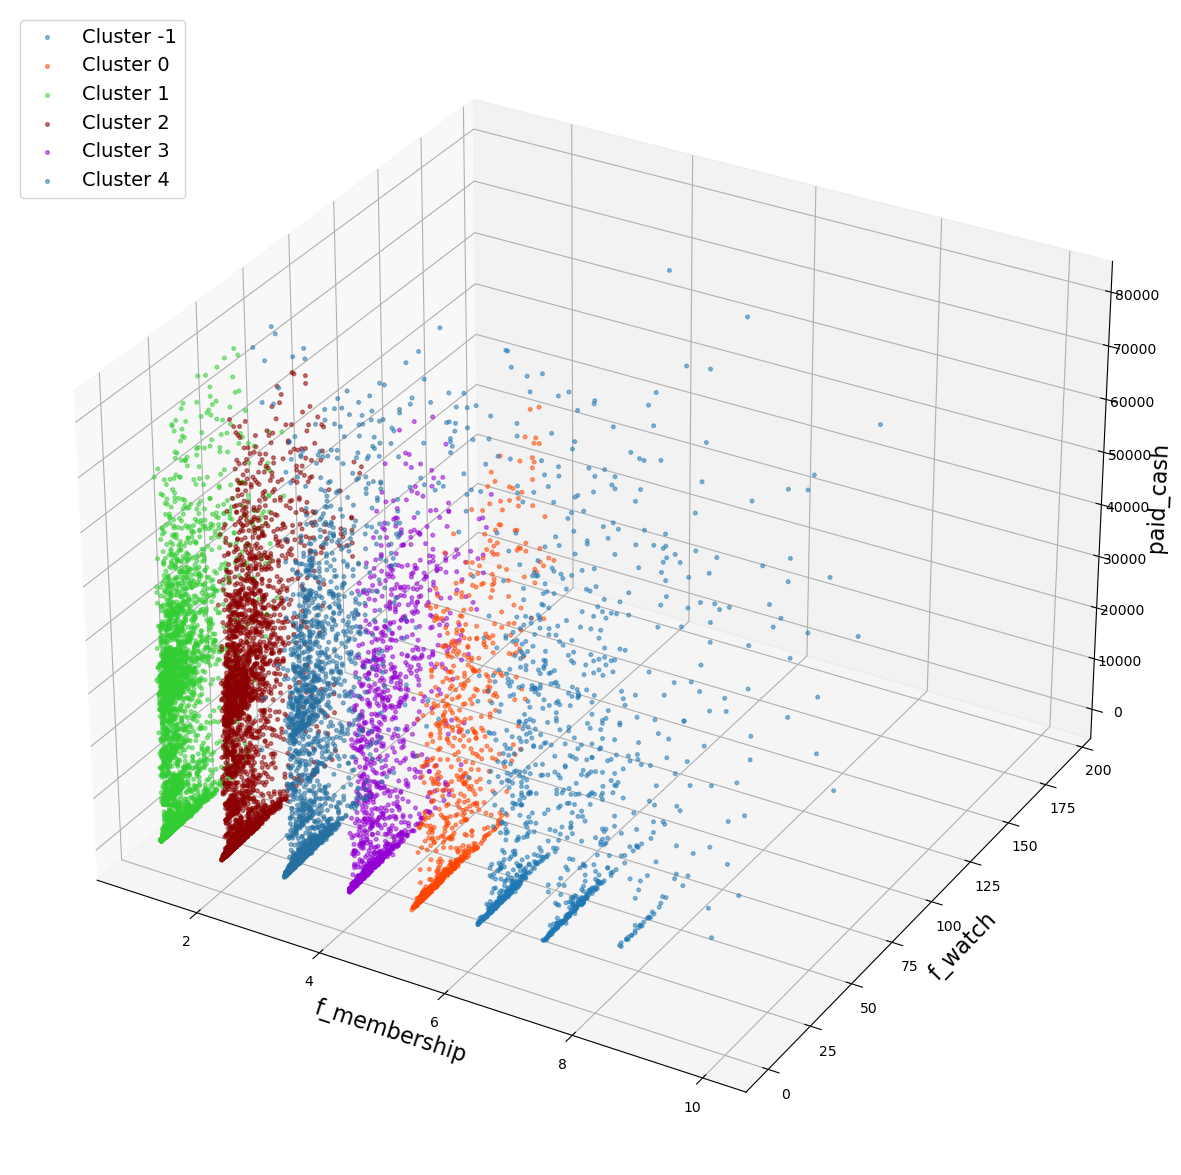

In [145]:
# 使用更为鲜明的颜色组合
colors = [
    "#1f77b4", "#ff4500", "#32cd32", "#8b0000", "#9400d3", "#2570a1", "#d5c59f",
    "#adff2f", "#ffa500", "#4b0082", "#f173ac", "#73b9a2", "#a03939", "#6f599c",
    "#ff1493", "#d2691e", "#00ced1", "#ff69b4", "#ffd700", "#f0dc70", "#007947"
]

# 进一步增加透明度
alpha_value = 0.5

# 保持点的大小
sizes = {cluster: 7 for cluster in df_fil['Cluster'].unique()}

fig = plt.figure(figsize=(20, 15))
dx = fig.add_subplot(111, projection='3d')

for i, label in enumerate(sorted(df_fil['Cluster'].unique())):
    dx.scatter(df_fil[df_fil.Cluster == label].Frequency,
               df_fil[df_fil.Cluster == label].f_watch,
               df_fil[df_fil.Cluster == label].paid_cash,
               c=[colors[i]],
               label='Cluster ' + str(label),
               s=sizes[label], alpha=alpha_value)

dx.set_xlabel('f_membership', fontsize=16)
dx.set_ylabel('f_watch', fontsize=16)
dx.set_zlabel('paid_cash', fontsize=16)
dx.legend(fontsize=14, loc='upper left')
dx.grid(True)  # 保持网格

plt.show()